# Chapter 4: Machine Learning state of the art
## Figure 4.16
Aging and decision trees: graph representation.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

# 0. Load the data
See notebook `figure_4.5-13.ipynb`

In [27]:
# Load the data (drop NaNs)
df = pd.read_csv('../data/aging_data.csv', header=0, index_col=0).dropna()
columns = df.columns.drop(['age'])

# Learning data, labels
dfx = df[columns]
dfy = df['age']

# Convert gender [m/f] in [0,1]
dfx.loc[:, 'gender'] = dfx['gender'].apply(lambda x: int(x == 'f'))

# 1. Fit `DecisionTreeRegressor`

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

mdl = GridSearchCV(tree.DecisionTreeRegressor(), param_grid={'max_depth': np.arange(1, 4)})
mdl.fit(dfx, dfy)

print(mdl.best_estimator_.get_params()['max_depth'])

3


In [29]:
import graphviz
dot_data = tree.export_graphviz(mdl.best_estimator_, out_file=None, 
                                feature_names=dfx.columns,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  

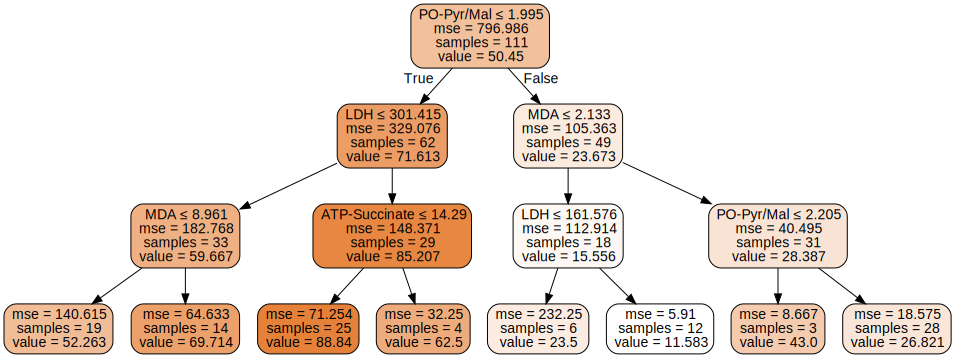

In [30]:
graph

In [31]:
graph.save('../images/decsion_tree_graph.dot')

'../images/decsion_tree_graph.dot'

In [33]:
# convert .dot to .png
! dot -Tpng ../images/decsion_tree_graph.dot -o ../images/decsion_tree_graph.png